In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$\gamma \geq \dfrac{3-S^2_\infty}{3(1+S^2_\infty)}$$

In [2]:
def gamma_lower_limit_no_delta(S):
    return (3-S**2)/(3*(1+S**2))

In [3]:
def gamma_upper_limit_no_delta(S):
    return (1+S**2)**(-1)

In [4]:
Sinf = np.arange(-10**(-3),1*10**(1),0.0001)
g = gamma_lower_limit_no_delta(Sinf)

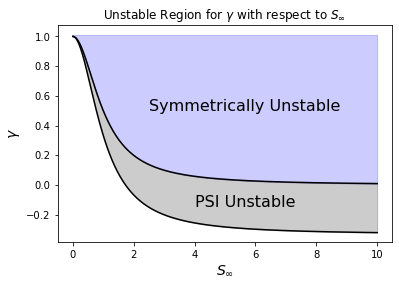

In [5]:
plt.fill_between(Sinf,g,gamma_upper_limit_no_delta(Sinf),color="k",alpha=0.2)
plt.fill_between(Sinf,gamma_upper_limit_no_delta(Sinf),1.01,color="b",alpha=0.2)
plt.plot(Sinf,gamma_upper_limit_no_delta(Sinf),c="k")
plt.plot(Sinf,g,c="k")
plt.ylabel(r"$\gamma$",fontsize=14)
plt.xlabel(r"$S_\infty$",fontsize=14)
plt.text(2.5,0.5,"Symmetrically Unstable",fontsize=16)
plt.text(4,-0.15,"PSI Unstable",fontsize=16)
plt.title(r"Unstable Region for $\gamma$ with respect to $S_\infty$")
plt.show()

$$ \gamma \geq \dfrac{3-S^2_\infty}{3(1+S^2_\infty)-\delta S^2_\infty} $$ 

In [10]:
def gamma_lower_limit(S,d):
    return (3-S**2)/(3*(1+S**2)-d*S**2)

In [11]:
def gamma_upper_limit(S,d):
    return ((1+S**2)-d*S**2)**(-1)

In [12]:
deltafix = 0.5
gd = gamma_lower_limit(Sinf,deltafix)

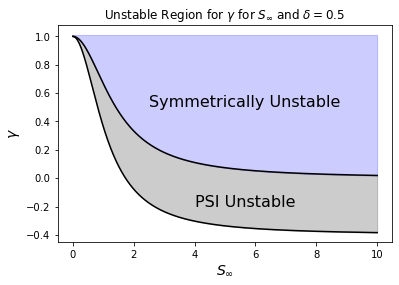

In [14]:
plt.fill_between(Sinf,gd,gamma_upper_limit(Sinf,deltafix),color="k",alpha=0.2)
plt.fill_between(Sinf,gamma_upper_limit(Sinf,deltafix),1.01,color="b",alpha=0.2)
plt.plot(Sinf,gamma_upper_limit(Sinf,deltafix),c="k")
plt.plot(Sinf,gd,c="k")
plt.ylabel(r"$\gamma$",fontsize=14)
plt.xlabel(r"$S_\infty$",fontsize=14)
plt.text(2.5,0.5,"Symmetrically Unstable",fontsize=16)
plt.text(4,-0.2,"PSI Unstable",fontsize=16)
plt.title(r"Unstable Region for $\gamma$ for $S_\infty$ and $\delta=0.5$")
plt.show()

In [15]:
((1e-5)**(0.5)*(5*10**(-3))*1e4)

0.15811388300841897

In [17]:
delta = np.arange(0,1,0.001)
Sfix = (1e-5)**(0.5)*(5*10**(-3))*1e4
gd2 = gamma_lower_limit(Sfix,delta)

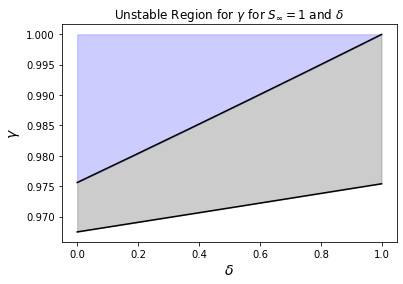

In [21]:
plt.fill_between(delta,gd2,gamma_upper_limit(Sfix,delta),color="k",alpha=0.2)
plt.fill_between(delta,gamma_upper_limit(Sfix,delta),1,color="b",alpha=0.2)
plt.plot(delta,gd2,c="k")
plt.plot(delta,gamma_upper_limit(Sfix,delta),c="k")
plt.ylabel(r"$\gamma$",fontsize=14)
plt.xlabel(r"$\delta$",fontsize=14)
# plt.text(0.2,0.6,"Symmetrically Unstable",fontsize=16)
# plt.text(0.35,0.425,"PSI Unstable",fontsize=16)
plt.title(r"Unstable Region for $\gamma$ for $S_\infty=1$ and $\delta$")
plt.show()

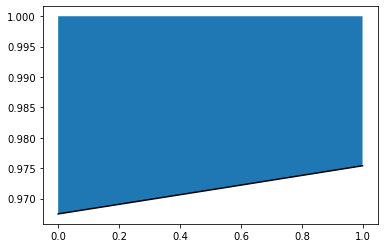

In [20]:
plt.fill_between(delta,gd2,1.)
plt.plot(delta,gd2,c="k")

In [ ]:
delta = np.arange(0,1,0.001)
gd3 = gammad(Sinf,delta[0]),ndmin=2

In [ ]:
gd3

In [ ]:
# plt.plot(Sinf,delta,gd3)

In [ ]:
((1e-4)**(0.5)*(1e-1))/1e-4

In [ ]:
(1e-4*0.05)/